https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb
https://colab.research.google.com/github/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb#scrollTo=E-hlmIU5tN3P


# <center>Lab 2</center>
# <center>Basics of Data Processing</center>


## Setup

In [2]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required


In [3]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [4]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request


In [5]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Get the data

With this code, we download and store the tgz file and extract it on the same location of the notebook and sub folders "datasets/employees/"

In [6]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/Darcinn/F21DL/main/"
EMPLOYEES_PATH = os.path.join("datasets", "employees")
EMPLOYEES_URL = DOWNLOAD_ROOT + "datasets/employees/employees.tar.gz"

def fetch_employees_data(employees_url=EMPLOYEES_URL, employees_path=EMPLOYEES_PATH):
    os.makedirs(employees_path, exist_ok=True)
    tgz_path = os.path.join(employees_path, "employees.tar.gz")
    urllib.request.urlretrieve(employees_url, tgz_path)
    employees_tgz = tarfile.open(tgz_path)
    employees_tgz.extractall(path=employees_path)
    employees_tgz.close()

In [7]:
fetch_employees_data()
# calling the function fetch_employees_data, (defined above) creates a datasets/employees directory in your workspace, downloads employees.tgz,
# downloads employees.tgz file and extracts the employees.csv file from it in this directory 

`load_employees_data` function loads the `employees.csv` into a panda `dataframe`

In [8]:
def load_employees_data(employees_path=EMPLOYEES_PATH):
    csv_path = os.path.join(employees_path, "employees.csv")
    return pd.read_csv(csv_path)

In [9]:
employees = load_employees_data() # "employees" is a pandas DataFrame object containing all the data
employees.head() # Display the top five rows of the DataFrame


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<u>Q1 How many attribuites in the data set?</u>
The dataset contains 35 attributes

<u>Desribe the attribuites.</u>
<br>Age - Integer representing the age of the employee
<br>Attrition - Boolean representing if attrition has occured or not
<br>BusinessTravel - String representing how much the employee travels for businesss
<br>Daily Rate - Integer representing the employees daily salary
<br>Department - String representing which department the employee belongs to
<br>DistanceFromHome - Integer representing how far the employee lives from work
<br>Education - Integer representing the employees level of Education (1 'Below College', 2 'College', 3 'Bachelor', 4 'Master', 5 'Doctor')
<br>Education Field - String representing their academic focus
<br>EmployeeCount - N/A
<br>EmployeeNumber - Integer displaying the employees ID number
<br>EnvironmentSatisfaction - Integer value denoting the employees satisfaction with their working environment (1 'Low', 2 'Medium', 3 'High', 4 'Very High')
<br>Gender - String denoting the employees gender
<br>HourlyRate - Integer represending the employees hourly wage
<br>JobInvolvment - Integer stating the employees level of involvment with their job (1 'Low', 2 'Medium', 3 'High', 4 'Very High')
<br>JobLevel - Integer denoting their level of employment
<br>JobRole - String detailing their role within the company
<br>JobSatisfaction - Integer expressing their satisafaction with their employment (1 'Low', 2 'Medium', 3 'High', 4 'Very High')
<br>MaritalStatus - String stating the employees marital status
<br>MonthlyIncome - Integer stating the employees monthly income
<br>MonthlyRate - Unsure
<br>NumCompaniesWorked - Integer stating how many companies the employee has worked at
<br>Over18 - Boolean stating whether the employy is over 18 years old
<br>OverTime - Integer stating how much overtime has been worked
<br>PercentSalaryHike - Integer stating what % their salary has increased by
<br>PerformanceRating - Integer detailing the rating of the performance by their employer (1 'Low', 2 'Good', 3 'Excellent', 4 'Outstanding')
<br>RelationshipSatisfaction - Integer expressing their satisafaction with their current relationship (1 'Low', 2 'Medium', 3 'High', 4 'Very High')
<br>StandardHours - Integer detailing their contracted working hours
<br>StockOptionLevel - Integer detailing the stock options available to them
<br>TotalWorkingYears - Integer stating how many years they have been working
<br>TrainingTimes - Integer detailing how many training sessions they have attended
<br>WorkLifeBalance - Integer detailing the current work/life balance (1 'Bad', 2 'Good', 3 'Better', 4 'Best')
<br>YearsAtCompany - Integer stating how many years they have been employed with their current company
<br>YearsInCurrentRole - Integer stating how many years they have held their current position for
<br>YearsSinceLastPromotion - Integer stating how many years it has been since their lasp promotion
<br>YearsWithCurrManager - Integer stating how many years they have worked with their current manager

Each row represents the information gathered from one district of the California Housing Data Set:  https://www.kaggle.com/harrywang/employees

In [10]:
#This method prints information about a DataFrame including the dtype and columns, non-null values and memory usage.
employees.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<u>Q2 Can you tell if there are any missing values? If yes, which attribuites contain missing values?</u>

There are no values that are missing or null. 

In [11]:
employees["Department"].value_counts() # Obviously ocean_proximity is a categorical attribuite
# Q3 What does the value_count() method display?

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [12]:
#This method shows a statistical summary of the numerical attributes 
employees.describe() 

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


The count, mean, min, and max rows are self-explanatory. Note that the null values are ignored (so, for example, the count of total_bedrooms is 20,433, not 20,640).

The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations fall.

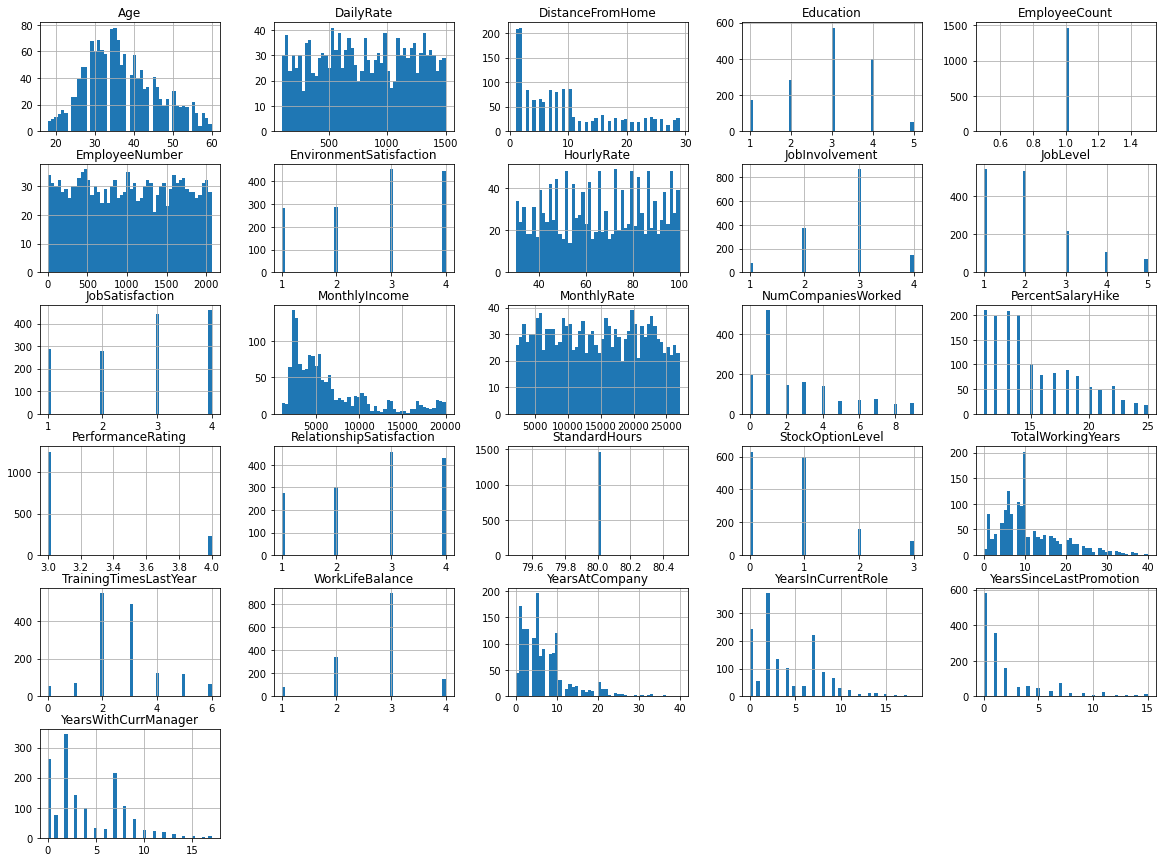

In [13]:
#To plot a histogram for each numerical attribute
employees.hist(bins=50, figsize=(20,15))
plt.show()


<u>Q4 List down the main observations you noted from the statistical summary and the histogram</u>

# Visualizing Geographical Data

<AxesSubplot:xlabel='JobLevel', ylabel='TotalWorkingYears'>

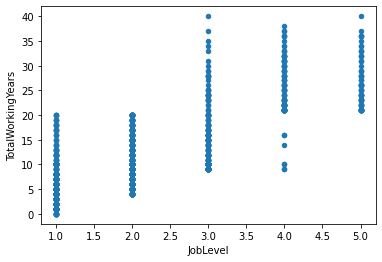

In [14]:
# Q5 Now you will plot 3 different variations of the data, which one is more indicative and why?
employees.plot(kind="scatter", x="JobLevel", y="TotalWorkingYears")


<AxesSubplot:xlabel='YearsAtCompany', ylabel='YearsSinceLastPromotion'>

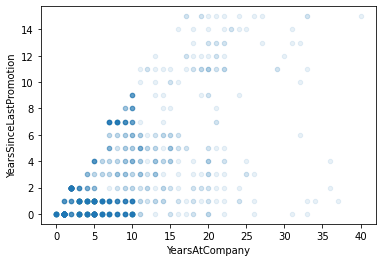

In [15]:
employees.plot(kind="scatter", x="YearsAtCompany", y="YearsSinceLastPromotion", alpha=0.1)

<AxesSubplot:xlabel='Age', ylabel='JobLevel'>

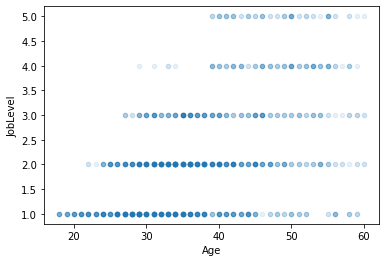

In [16]:
employees.plot(kind="scatter", x="Age", y="JobLevel", alpha=0.1)

In [17]:
# Now we will look at the correlation of all the attributes with the expected class attribute (median-house-value)
corr_matrix = employees.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes

In [18]:
corr_matrix["Age"].sort_values(ascending=False)
# Q6 Which are the most correlated attributes with the output variable(i.e.Age)?
# Does that make sense? 

Age                         1.000000
TotalWorkingYears           0.680381
JobLevel                    0.509604
MonthlyIncome               0.497855
YearsAtCompany              0.311309
NumCompaniesWorked          0.299635
YearsSinceLastPromotion     0.216513
YearsInCurrentRole          0.212901
Education                   0.208034
YearsWithCurrManager        0.202089
RelationshipSatisfaction    0.053535
StockOptionLevel            0.037510
JobInvolvement              0.029820
MonthlyRate                 0.028051
HourlyRate                  0.024287
DailyRate                   0.010661
EnvironmentSatisfaction     0.010146
PercentSalaryHike           0.003634
PerformanceRating           0.001904
DistanceFromHome           -0.001686
JobSatisfaction            -0.004892
EmployeeNumber             -0.010145
TrainingTimesLastYear      -0.019621
WorkLifeBalance            -0.021490
EmployeeCount                    NaN
StandardHours                    NaN
Name: Age, dtype: float64

<u>Q6 Which are the most correlated attributes with the output variable(i.e.Age)?</u>

The most correlated attributes in regards to age appear to be Total Working Years, Job Level and Monthly Income.


<u>Does that make sense?</u>

This outcome is exactly what is to be expected as an older employee will generally mean more years of expeerience therefore a higher positoon achieved resulting in a higher monthly salary

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='TotalWorkingYears', ylabel='Age'>,
        <AxesSubplot:xlabel='JobLevel', ylabel='Age'>,
        <AxesSubplot:xlabel='MonthlyIncome', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='TotalWorkingYears'>,
        <AxesSubplot:xlabel='TotalWorkingYears', ylabel='TotalWorkingYears'>,
        <AxesSubplot:xlabel='JobLevel', ylabel='TotalWorkingYears'>,
        <AxesSubplot:xlabel='MonthlyIncome', ylabel='TotalWorkingYears'>],
       [<AxesSubplot:xlabel='Age', ylabel='JobLevel'>,
        <AxesSubplot:xlabel='TotalWorkingYears', ylabel='JobLevel'>,
        <AxesSubplot:xlabel='JobLevel', ylabel='JobLevel'>,
        <AxesSubplot:xlabel='MonthlyIncome', ylabel='JobLevel'>],
       [<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>,
        <AxesSubplot:xlabel='TotalWorkingYears', ylabel='MonthlyIncome'>,
        <AxesSubplot:xlabel='JobLevel', ylabel='MonthlyIncome'>,
        <AxesSubplot:xlabel='Monthl

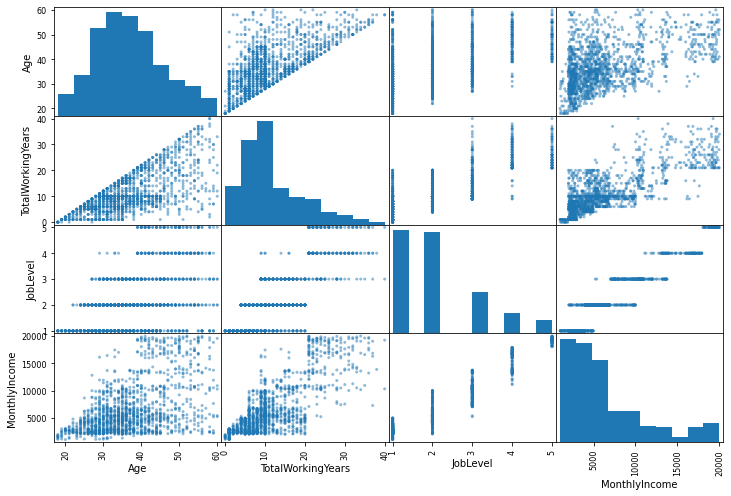

In [19]:
from pandas.plotting import scatter_matrix

attributes = ["Age", "TotalWorkingYears", "JobLevel",
              "MonthlyIncome"]
scatter_matrix(employees[attributes], figsize=(12, 8))
# Another way to check for correlation between attributes is to use the pandas scatter_matrix() function above
# Here we choose to plot 4 promising  numerical attributes against each other


(16.0, 65.0, 0.0, 20000.0)

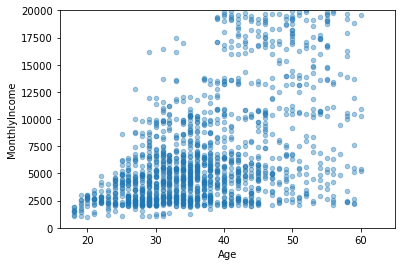

In [20]:
# let’s zoom in on the correlation scatterplot "monthly income & age,"
employees.plot(kind="scatter", x="Age", y="MonthlyIncome",
             alpha=0.4)
plt.axis([16, 65, 0, 20000])
#Q7 Describe the plot below. What does this indicate? Do you have an explanation for the solid line?

In [21]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
job_level = pd.DataFrame(encoder.fit_transform(employees[["JobLevel"]]).toarray(),
                         columns=encoder.get_feature_names_out())
encoded_df = pd.concat([employees, job_level], axis=1).drop("JobLevel", axis=1)

In [22]:
other_cols = [c for c in encoded_df.columns if not c.startswith("JobLevel_")]
dfs = []
for col in encoder.get_feature_names_out():
    df = encoded_df[[col, *other_cols]]
    dfs.append(df.corr()[col])
pd.concat(dfs, axis=1).transpose().sort_values(["JobLevel_1"], axis=1, ascending=False, key=abs)

,JobLevel_1,MonthlyIncome,TotalWorkingYears,YearsAtCompany,Age,YearsInCurrentRole,YearsWithCurrManager,YearsSinceLastPromotion,NumCompaniesWorked,Education,...,RelationshipSatisfaction,TrainingTimesLastYear,DailyRate,EnvironmentSatisfaction,EmployeeCount,StandardHours,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5
JobLevel_1,1.0,-0.604300,-0.530191,-0.384435,-0.368664,-0.362492,-0.353212,-0.236254,-0.138516,-0.120762,...,0.006848,0.005435,0.002587,-0.002477,NaN,NaN,NaN,NaN,NaN,NaN
JobLevel_2,NaN,-0.160595,-0.083161,-0.031493,-0.026844,0.047480,0.072271,-0.070809,0.041255,0.053187,...,-0.026617,0.008959,-0.016163,0.012395,NaN,NaN,1.0,NaN,NaN,NaN
JobLevel_3,NaN,0.293857,0.205989,0.161651,0.144542,0.217220,0.172880,0.150968,0.045135,0.041098,...,-0.009332,0.014478,0.028216,-0.023378,NaN,NaN,NaN,1.0,NaN,NaN
JobLevel_4,NaN,0.533144,0.508648,0.313099,0.323999,0.177679,0.152584,0.229489,0.070057,0.057103,...,0.030420,-0.052499,-0.019373,0.008406,NaN,NaN,NaN,NaN,1.0,NaN
JobLevel_5,NaN,0.598335,0.430752,0.294318,0.263177,0.136915,0.164564,0.165785,0.060753,0.015733,...,0.023375,0.007105,0.007132,0.006470,NaN,NaN,NaN,NaN,NaN,1.0


In [23]:
top_two_features = employees[["MonthlyIncome", "TotalWorkingYears", "YearsInCurrentRole"]]
top_five_features = employees[
    ["MonthlyIncome", "TotalWorkingYears", "YearsAtCompany", "Age", "YearsInCurrentRole", "YearsWithCurrManager",
     "YearsSinceLastPromotion", "Education"]]
top_ten_features = employees[
    ["MonthlyIncome", "TotalWorkingYears", "YearsAtCompany", "Age", "YearsInCurrentRole", "YearsWithCurrManager",
     "YearsSinceLastPromotion", "NumCompaniesWorked", "Education", "MonthlyRate", "DistanceFromHome", "EmployeeNumber",
     "TrainingTimesLastYear", "PercentSalaryHike"]]

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


def test_accuracy(x, y, test_size=0.5):
    y = LabelEncoder().fit_transform(y)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

    classifier = SVC()
    classifier.fit(x_train, y_train)

    result = classifier.predict(x_test)
    print(classification_report(y_test, result))


In [42]:
x = employees.drop("JobLevel", axis=1).select_dtypes(['number'])
test_accuracy(x, employees["JobLevel"])

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       273
           1       0.80      0.86      0.83       257
           2       0.73      0.66      0.69       114
           3       0.81      0.62      0.71        56
           4       0.82      0.91      0.86        35

    accuracy                           0.84       735
   macro avg       0.82      0.80      0.80       735
weighted avg       0.84      0.84      0.84       735



In [43]:
test_accuracy(top_two_features, employees["JobLevel"])

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       272
           1       0.86      0.87      0.87       280
           2       0.76      0.76      0.76       105
           3       0.74      0.93      0.82        42
           4       1.00      0.92      0.96        36

    accuracy                           0.87       735
   macro avg       0.86      0.88      0.87       735
weighted avg       0.88      0.87      0.87       735



In [44]:
test_accuracy(top_five_features, employees["JobLevel"])

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       278
           1       0.81      0.84      0.83       251
           2       0.74      0.79      0.76       107
           3       0.89      0.89      0.89        61
           4       1.00      1.00      1.00        38

    accuracy                           0.86       735
   macro avg       0.88      0.88      0.88       735
weighted avg       0.86      0.86      0.86       735



In [45]:
test_accuracy(top_ten_features, employees["JobLevel"])

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       263
           1       0.82      0.85      0.83       279
           2       0.75      0.65      0.70       115
           3       0.90      0.71      0.80        49
           4       0.88      0.97      0.92        29

    accuracy                           0.84       735
   macro avg       0.85      0.82      0.83       735
weighted avg       0.84      0.84      0.84       735

